In [3]:
# Import the required libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set a visualization style
sns.set(style="whitegrid")


In [4]:
# Load the CSV file into a DataFrame
df = pd.read_csv("hospData_NA.csv")

# Display the first 5 rows to check the data
print("First 5 rows of the dataset:")
print(df.head())


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7284\433942943.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("hospData_NA.csv")


First 5 rows of the dataset:
   Unnamed: 0  encounter_id  patient_nbr             race  gender      age  \
0           1       2278392      8222157        Caucasian  Female   [0-10)   
1           2        149190     55629189        Caucasian  Female  [10-20)   
2           3         64410     86047875  AfricanAmerican  Female  [20-30)   
3           4        500364     82442376        Caucasian    Male  [30-40)   
4           5         16680     42519267        Caucasian    Male  [40-50)   

  weight  admission_type_id  discharge_disposition_id  admission_source_id  \
0    NaN                  6                        25                    1   
1    NaN                  1                         1                    7   
2    NaN                  1                         1                    7   
3    NaN                  1                         1                    7   
4    NaN                  1                         1                    7   

   ...  citoglipton insulin glybu

In [5]:
# Print the shape (number of rows and columns)
print("Dataset shape:", df.shape)

# Print the column names and data types
print("\nDataset Information:")
print(df.info())

# List the columns for a quick reference
print("\nColumn Names:")
print(df.columns.tolist())


Dataset shape: (101766, 51)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Unnamed: 0                101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      99493 non-null   object
 4   gender                    101763 non-null  object
 5   age                       101766 non-null  object
 6   weight                    3197 non-null    object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                61510 non-null   object
 12  medical_specialty         51817 non-null   object
 13  num_lab_p

In [6]:
# Calculate and print the number of missing values per column
print("Missing values per column:")
print(df.isnull().sum())



Missing values per column:
Unnamed: 0                      0
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide       

In [7]:
# Remove duplicate rows (if any)
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows before cleaning: {num_duplicates}")
df = df.drop_duplicates()
print("Duplicates removed.")

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values in numeric columns with the median
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Fill missing values in categorical columns with the mode (most frequent value)
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# (Optional) Convert any columns with "date" in their name to datetime
for col in df.columns:
    if "date" in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')

print("Missing values filled and data cleaned.")


Number of duplicate rows before cleaning: 0
Duplicates removed.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7284\3365557879.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Missing values filled and data cleaned.


In [8]:
# Verify that there are no more missing values
print("Missing values after cleaning:")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Missing values after cleaning:
Unnamed: 0                  0
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide

In [9]:
# For each categorical column, print the unique value counts
for col in cat_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())



Value counts for 'race':
race
Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

Value counts for 'gender':
gender
Female    54711
Male      47055
Name: count, dtype: int64

Value counts for 'age':
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

Value counts for 'weight':
weight
[75-100)     99905
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

Value counts for 'payer_code':
payer_code
MC    72695
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count

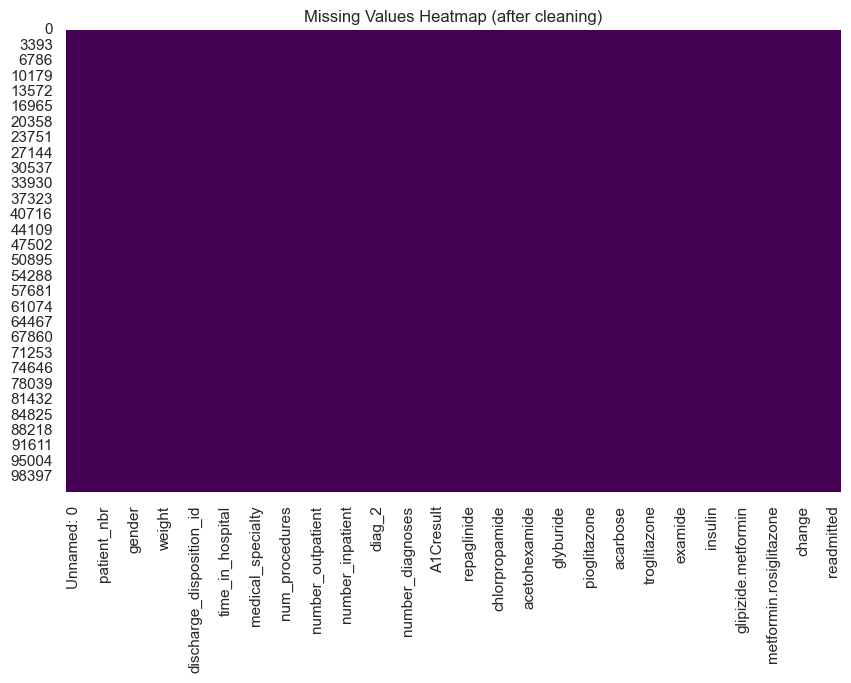

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (after cleaning)")
plt.show()


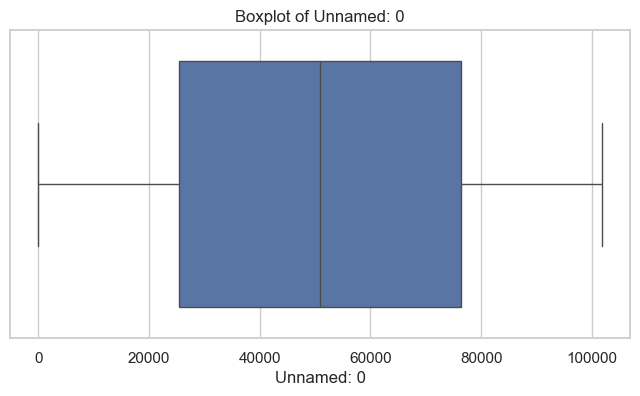

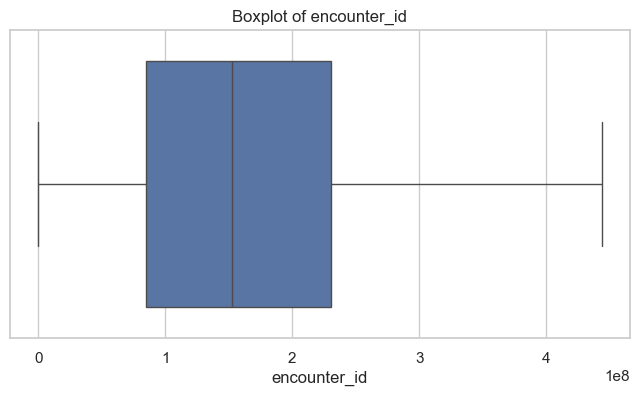

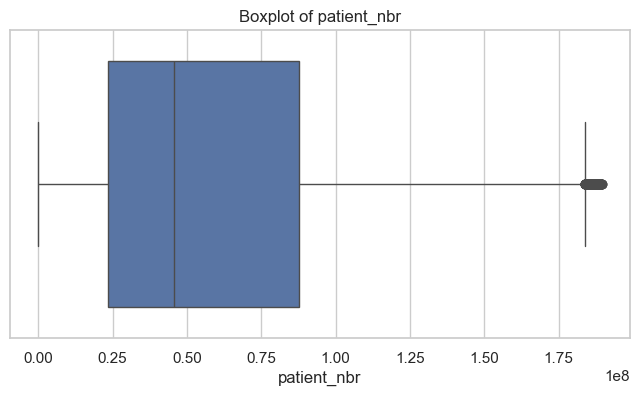

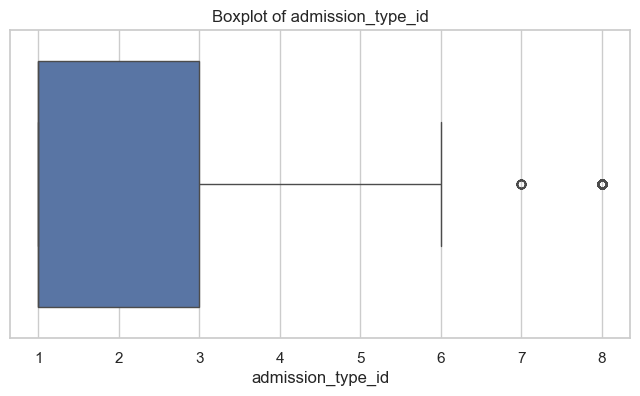

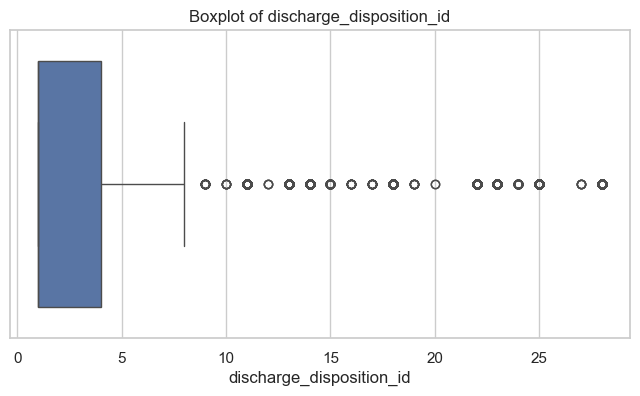

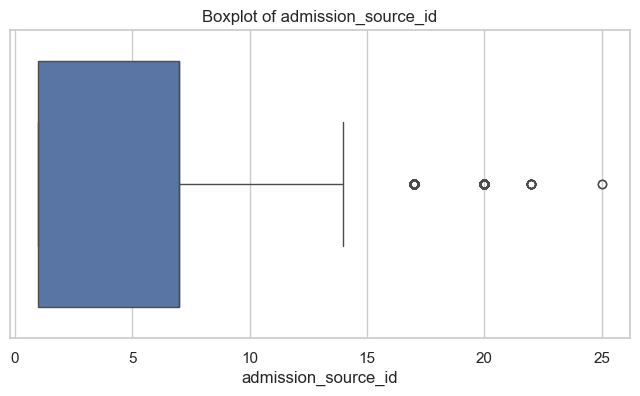

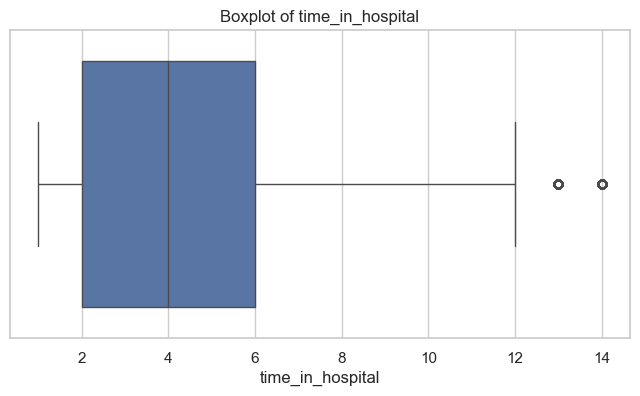

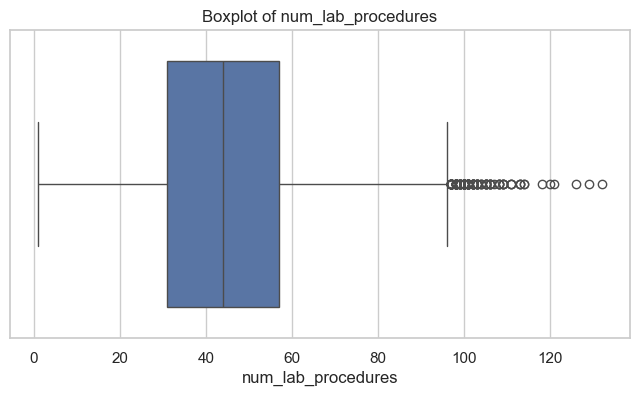

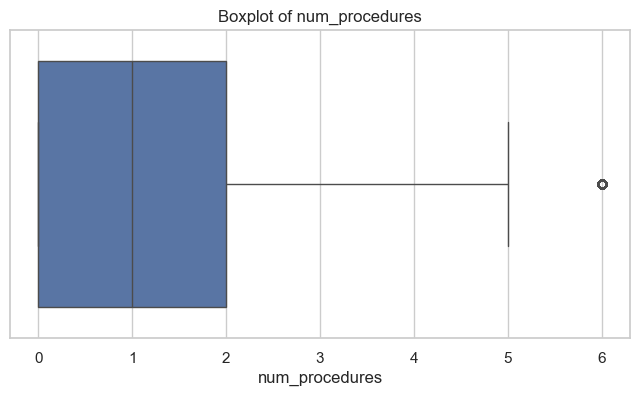

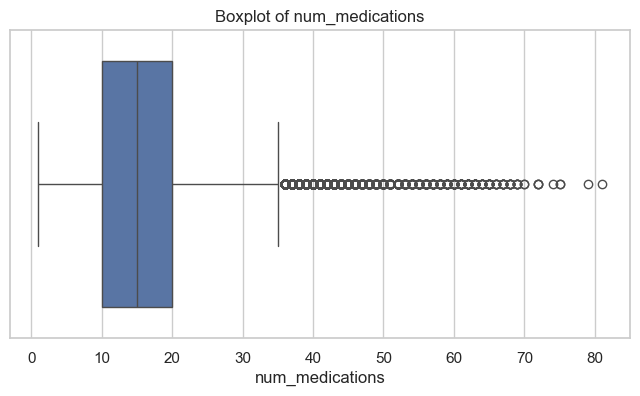

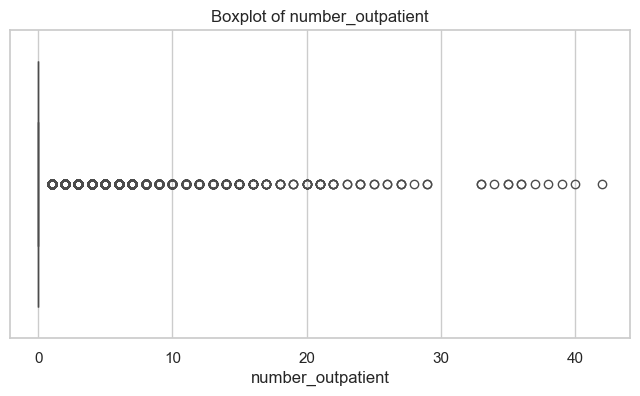

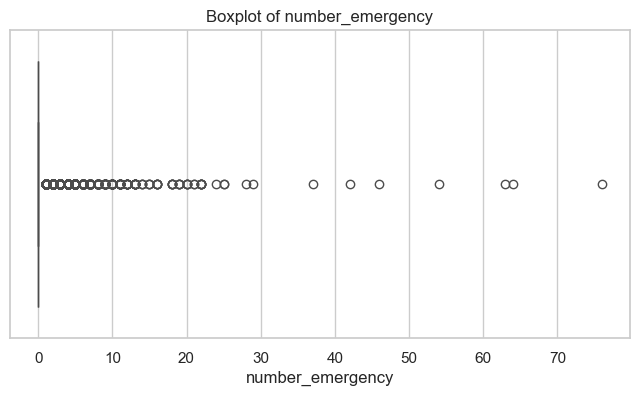

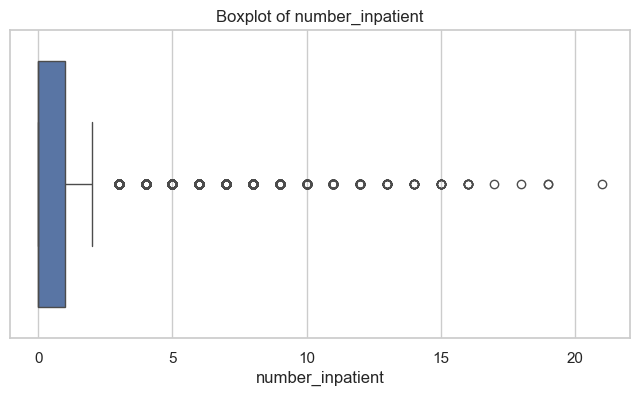

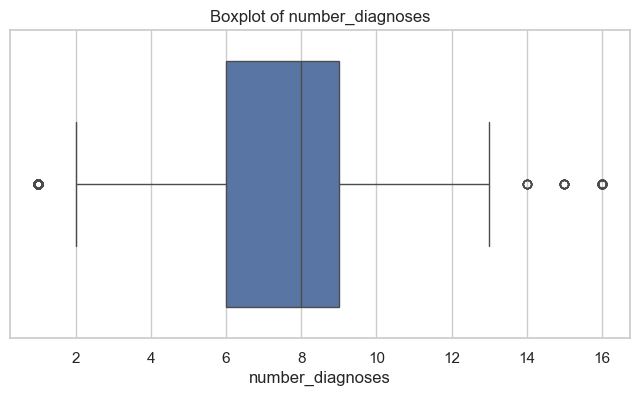

In [11]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: 'Caucasian'

<Figure size 1000x800 with 0 Axes>